In [1]:
import pandas as pd
from analysis.homogeneous.analysis import best, plot, plt_comparison

In [2]:
all_data_df = pd.read_csv('all_data.tsv', sep='\t')

Overall plots of all different simulations

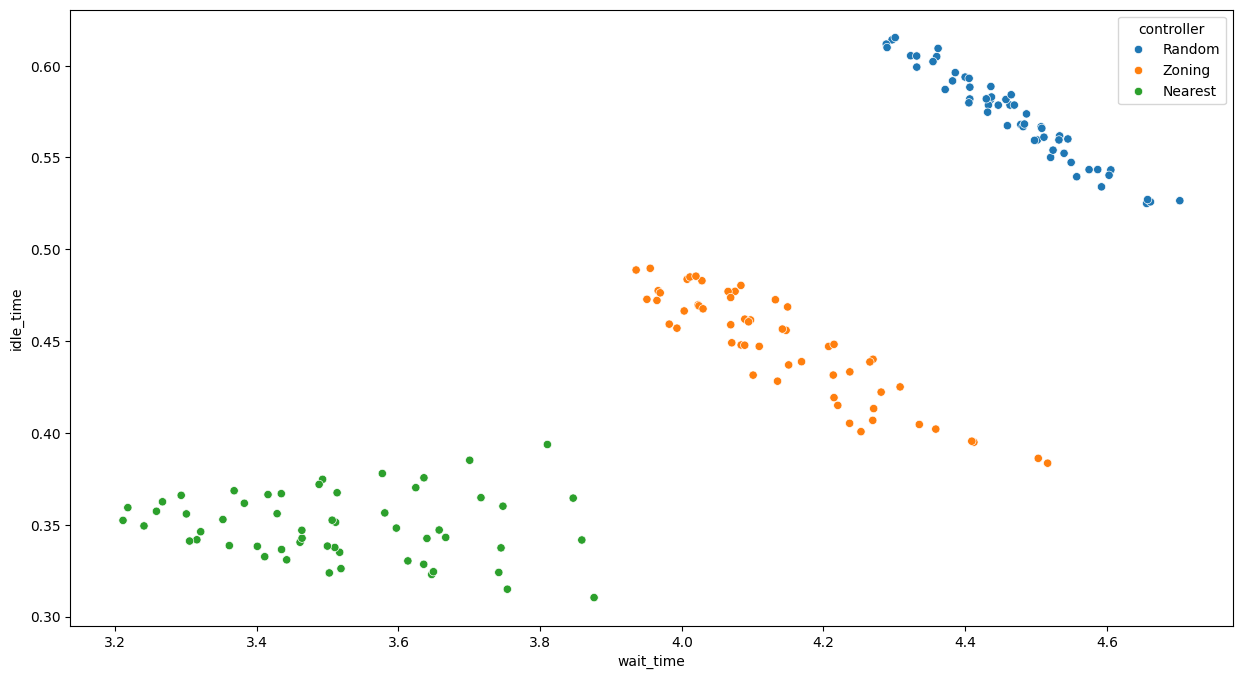

In [3]:
plot(all_data_df,"overall_plot")

Best Idle Configuration

In [4]:
best_configuration = best(all_data_df, 'idle_floor_config')
best_configuration[0]

Best idle_floor_config: (3, 3, 4)


,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
93,Random,"(3, 3, 4)",200,4.301266,0.035940,0.615279,0.012410,4.337205
94,Zoning,"(3, 3, 4)",192,4.083464,0.031577,0.480329,0.012607,4.115040
95,Nearest,"(3, 3, 4)",375,3.211126,0.030361,0.352345,0.011523,3.241487


Best controller

Best controller: Nearest


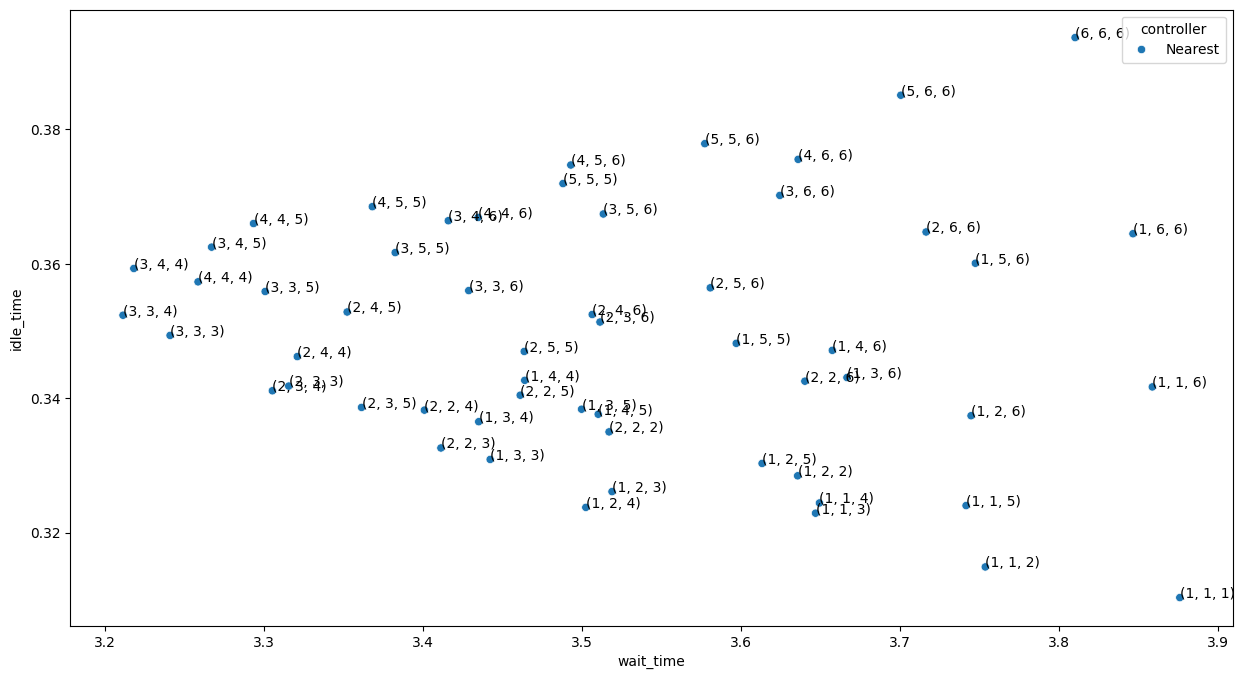

In [5]:
best_controller = best(all_data_df, 'controller')
best_controller_data = all_data_df.loc[all_data_df['controller'] == best_controller[1]]
plot(best_controller_data, 'best_controller_plot', True)

In [ ]:
best_controller[0].head()

,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
2,Nearest,"(2, 2, 2)",354,3.516983,0.028534,0.334979,0.010982,3.545517
5,Nearest,"(3, 5, 6)",334,3.513374,0.033789,0.367416,0.011526,3.547163
8,Nearest,"(1, 6, 6)",286,3.846667,0.032047,0.364479,0.011042,3.878714
11,Nearest,"(2, 2, 5)",332,3.461077,0.030802,0.340439,0.010602,3.491879
14,Nearest,"(4, 4, 4)",398,3.258347,0.031225,0.357317,0.011201,3.289572


Specific Comparisons

In [ ]:
from run_experiment import run_experiment, run_analysis
import simulation.classes.groupController as gControl


In [ ]:
    # Seed for randomness
params = {
        "seed": 1,
        "num_floors": 6,
        "num_elevators": 3,
        "total_arrival_rate": 0.6,
        "simulation_duration": 72000
        }

print("random seed:", params["seed"])
print("simulation duration:", params["simulation_duration"])
print("number of floors:", params["num_floors"])
print("number of elevators:", params["num_elevators"])

zoning_params = {
        "zones": {
                1: [1, 2],
                2: [3, 4],
                3: [5, 6]
        }
        }

conditions = {
        "Random": (gControl.RandomController, {}),
        "Zoning": (gControl.ZoningController, zoning_params),
        "Nearest": (gControl.NearestElevatorController, {})
        }
    
controller_params = {
        "idle_floors": [1] * params["num_elevators"]
        }

# all_idle_combinations = get_all_idle_combinations(params["num_floors"], params["num_elevators"])

# print("idle combination:", len(all_idle_combinations))

collated_result = []

for controller_name, (controller_class, controller_params) in conditions.items():
            controller_params["idle_floors"] = [3,3,4]
            sim_result = run_experiment(params, controller_class, controller_params)
    
            result = run_analysis(params, sim_result, controller_name) 
            result["overall_stats"] = result["overall_stats"].set_index("stat label")
    
            trial_result = {
                    "controller": controller_name,
                #     "idle_floor_config": (3,3,4),
                        "steady state average": result['wait_time'].loc[:,'steady state average'],
                        "floor": result['wait_time'].loc[:, 'floor'],
                        "lower interval": result['wait_time'].loc[:, "lower interval"],
                        "upper interval": result['wait_time'].loc[:, "upper interval"]
                        # "idle_time": result['idle_time'].loc[:,'steady state average'],
                        # "idle_time": result['idle_time'].loc[:,'steady state average'],


                #     "num_cycles": result["num_cycles"],
                #     "wait_time":result["overall_stats"].loc["avg_wait_time", "steady state average"],
                #     "wait_time_interval":result["overall_stats"].loc["avg_wait_time", "interval 1-side length"],
                #     "idle_time":result["overall_stats"].loc["avg_idle_time", "steady state average"],
                #     "idle_time_interval":result["overall_stats"].loc["avg_idle_time", "interval 1-side length"]
                    }
            collated_result.append(trial_result)






# collated_df = pd.DataFrame(collated_result)

random seed: 1
simulation duration: 72000
number of floors: 6
number of elevators: 3


In [ ]:
a = pd.DataFrame(collated_result[0])
b = pd.DataFrame(collated_result[1])
c = pd.DataFrame(collated_result[2])
wait_data = [a,b,c]

In [ ]:
plt_comparison(wait_data,conditions.keys() )